In [5]:
import os
import cv2
import torch
import random
import matplotlib.pyplot as plt

from utils_.plotting import plot_path
from utils_.utils import from_sim_get_poses_n_gripper
from utils_.waypoint_extraction import pickplace_task_waypoints

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Device Name: {torch.cuda.get_device_name(device)}" if device.type == "cuda" else "Using cpu")
DATA_PATH = "./datasets/sim_recs"
IMAGE_RESIZE = 256
LATENT_DIM = 6

Device Name: NVIDIA GeForce RTX 3090


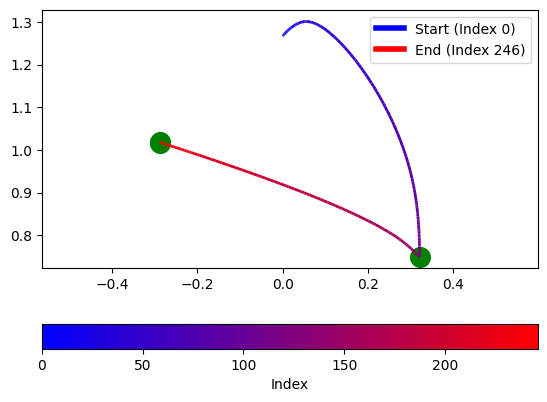

In [7]:
pos, quat, gripper_widths = from_sim_get_poses_n_gripper(f"{DATA_PATH}/rec4910/proprioceptives.txt")

ways = pickplace_task_waypoints(pos, gripper_widths)

plot_path(pos[:, 0], pos[:, 2], ways[:, 0], ways[:, 2])

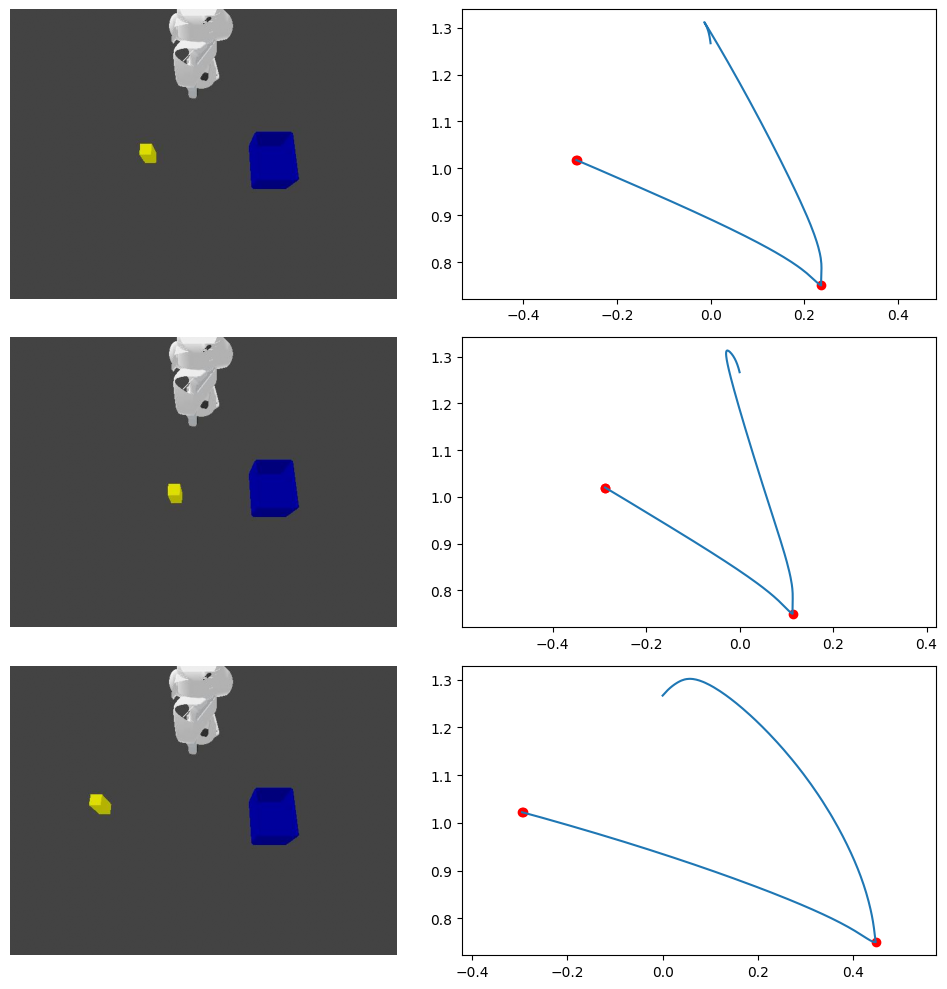

In [8]:
examples = 3
dirs = os.listdir(DATA_PATH)

fig, axes = plt.subplots(examples, 2, figsize=(10, 10))
for i in range(examples):
    dir = random.choice(dirs)
    pos, quat, gripper_widths = from_sim_get_poses_n_gripper(f"{DATA_PATH}/{dir}/proprioceptives.txt")
    ways = pickplace_task_waypoints(pos, gripper_widths)

    image = cv2.imread(f"{DATA_PATH}/{dir}/images/0000.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image/255.0

    axes[i, 0].imshow(image)
    axes[i, 1].plot(pos[:, 0], pos[:, 2])
    axes[i, 1].scatter(ways[:, 0], ways[:, 2], c="r")

    axes[i, 0].axis('off')
    axes[i, 1].axis('equal')
plt.tight_layout()
plt.show()